In [1]:
import pandas as pd
import numpy as np


In [2]:
#reading dataset
train_df = pd.read_excel('train.xlsx') 
#val_df = pd.read_excel('val.xlsx')
test_df = pd.read_excel('test.xlsx')


In [3]:
train_df.info()
print()
test_df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4994 entries, 0 to 4993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4994 non-null   int64 
 1   cleaned     4994 non-null   object
 2   classes     4994 non-null   object
 3   labels      4994 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  625 non-null    int64 
 1   cleaned     625 non-null    object
 2   classes     625 non-null    object
 3   labels      625 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.7+ KB



In [4]:
train_df.head()

,Unnamed: 0,cleaned,classes,labels
0,0,মেডিকেলে এসে ঠিক ফ্যামিলির ফটো ফ্রেম এর মতো মন...,sadness,1
1,1,অনেক দিন পর অন্য রকম অনুভূতি হচ্ছে কেননা আমার...,sadness,1
2,2,আগে যতোটা বেশি পছন্দ করতাম দুশ্চরিত্রা মিথিলা ...,disgust,3
3,3,মাঝে মাঝে মনে হয় তোমাকে চাওয়াটা অনেক ভুল হয়ত ভ...,sadness,1
4,4,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,5


In [5]:
test_df.head()

,Unnamed: 0,cleaned,classes,labels
0,0,দুই বছরের ব্যবধানে বগুড়া থেকে বিদেশে পণ্য রপ্ত...,joy,0
1,1,আওয়ামী লীগ সরকার বাংলাদেশকে অন্ধকার কুয়া থেকে ...,joy,0
2,2,চোখ কচলাতে কচলাতে বেশ রাগান্বীত কন্ঠ বলল ধুরো ...,disgust,3
3,3,মেয়েটা অতিরিক্ত আত্মপরিচয় সংকটে ভুগে সাবিলা স্...,disgust,3
4,4,এবার উন্নয়ন মুলক কাজের কিছু দৃশ্যমান পরিদশন ক...,joy,0


In [6]:
train_df["classes"].value_counts()

disgust     1233
sadness      942
joy          908
fear         700
anger        621
surprise     590
Name: classes, dtype: int64

In [7]:
test_df["classes"].value_counts()

disgust     165
sadness     119
joy         114
fear         83
surprise     73
anger        71
Name: classes, dtype: int64

In [8]:
Train_review = train_df["cleaned"].values.tolist()
Train_sentiment = train_df["classes"].tolist() 

In [9]:
Test_review = test_df["cleaned"].values.tolist()
Test_sentiment = test_df["classes"].tolist() 

In [10]:
x_train, x_test, y_train, y_test = Train_review, Test_review, Train_sentiment, Test_sentiment

In [11]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [12]:
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 23
	95percentile : 42
	99percentile : 58


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 24
	95percentile : 45
	99percentile : 59


In [13]:
model = t.get_classifier()

In [14]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

simulating training for different learning rates... this may take a few moments...
832/832 [==============================] - 8015s 10s/step - loss: 52.4456 - accuracy: 0.1965


done.
Visually inspect loss plot and select learning rate associated with falling loss


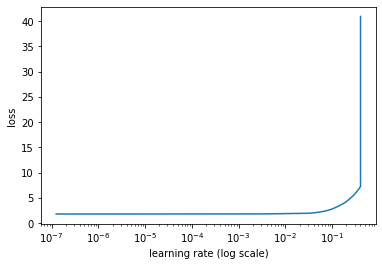

In [15]:
learner.lr_find(show_plot=True, max_epochs=1)

In [15]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
833/833 [==============================] - 8107s 10s/step - loss: 1.6556 - accuracy: 0.3288 - val_loss: 1.5651 - val_accuracy: 0.4112
Epoch 2/4
833/833 [==============================] - 8086s 10s/step - loss: 1.3715 - accuracy: 0.4752 - val_loss: 1.2467 - val_accuracy: 0.5424
Epoch 3/4
833/833 [==============================] - 8087s 10s/step - loss: 1.0559 - accuracy: 0.6063 - val_loss: 1.2416 - val_accuracy: 0.5552
Epoch 4/4
833/833 [==============================] - 8047s 10s/step - loss: 0.6594 - accuracy: 0.7671 - val_loss: 1.2396 - val_accuracy: 0.5600


In [17]:
class_names = ['joy', 'sadness','surprise','disgust','anger','fear']

In [ ]:
learner.validate(val_data=(val), class_names=class_names)

In [14]:
learner1 = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [15]:
learner1.autofit(2e-5, 4)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/4
833/833 [==============================] - 8093s 10s/step - loss: 1.6281 - accuracy: 0.3376 - val_loss: 1.3868 - val_accuracy: 0.4640
Epoch 2/4
833/833 [==============================] - 8126s 10s/step - loss: 1.3164 - accuracy: 0.5010 - val_loss: 1.2581 - val_accuracy: 0.5360
Epoch 3/4
833/833 [==============================] - 7975s 10s/step - loss: 1.0717 - accuracy: 0.5969 - val_loss: 1.2182 - val_accuracy: 0.5600
Epoch 4/4
833/833 [==============================] - 8080s 10s/step - loss: 0.8839 - accuracy: 0.6740 - val_loss: 1.2312 - val_accuracy: 0.5680


In [ ]:
learner1.validate(val_data=(val), class_names=class_names)